In [1]:
import pandas as pd
import numpy as np

In [2]:
from bs4 import BeautifulSoup

In [3]:
import requests

In [4]:
res=requests.get("https://www.mygov.in/corona-data/covid19-statewise-status")

In [5]:
web_page=res.content
soup=BeautifulSoup(web_page,'html.parser')
type(soup)

bs4.BeautifulSoup

In [6]:
title=soup.title
print(title)

<title>COVID19 STATEWISE STATUS | MyGov.in</title>


In [7]:
list1=[]
all_rows = soup.find_all('div',{'class':'field-name-field-select-state'})
all_confirmed = soup.find_all('div',{'class':'field-name-field-total-confirmed-indians'})
all_cured = soup.find_all('div',{'class':'field-name-field-cured'})
all_deaths = soup.find_all('div',{'class':'field-name-field-deaths'})

In [8]:
def get_values(row):
    tr=row.find('div',{'class':'field-item even'})
    return tr.text

for j in range(len(all_rows)):
    lst1 = []
    lst1.append(get_values(all_rows[j]))
    lst1.append(get_values(all_confirmed[j]))
    lst1.append(get_values(all_cured[j]))
    lst1.append(get_values(all_deaths[j]))
    list1.append(lst1)
print(list1)

[['AndhraPradesh', '473', '14', '9'], ['AndamanNicobar', '11', '10', '0'], ['Bihar', '66', '26', '1'], ['Chandigarh', '21', '7', '0'], ['Chhattisgarh', '31', '10', '0'], ['Delhi', '1510', '30', '28'], ['Goa', '7', '5', '0'], ['Gujarat', '617', '55', '26'], ['Haryana', '199', '34', '3'], ['HimachalPradesh', '32', '13', '1'], ['J & K', '270', '16', '4'], ['Karnataka', '258', '65', '9'], ['Kerala', '379', '198', '3'], ['Ladakh', '15', '10', '0'], ['MP', '730', '51', '50'], ['Maharashtra', '2337', '229', '160'], ['Manipur', '2', '1', '0'], ['Mizoram', '1', '0', '0'], ['Odisha', '55', '18', '1'], ['Puducherry', '7', '1', '0'], ['Punjab', '176', '14', '12'], ['Rajasthan', '879', '133', '3'], ['TamilNadu', '1173', '58', '11'], ['Telengana', '624', '100', '17'], ['Uttarakhand', '35', '7', '0'], ['UttarPradesh', '657', '49', '5'], ['West Bengal', '190', '36', '7'], ['Assam', '31', '0', '1'], ['Jharkhand', '24', '0', '2'], ['Arunachal Pradesh', '1', '0', '0'], ['Tripura', '2', '0', '0'], ['Nagal

In [9]:
cols = ['STATE NAMES','TOTAL CONFIRMED','CURED/MIGRATED','DEATH']

In [10]:
dataset = pd.DataFrame(data = list1,columns=cols)
dataset

,STATE NAMES,TOTAL CONFIRMED,CURED/MIGRATED,DEATH
0,AndhraPradesh,473,14,9
1,AndamanNicobar,11,10,0
2,Bihar,66,26,1
3,Chandigarh,21,7,0
4,Chhattisgarh,31,10,0
5,Delhi,1510,30,28
6,Goa,7,5,0
7,Gujarat,617,55,26
8,Haryana,199,34,3
9,HimachalPradesh,32,13,1


In [11]:
df=dataset.drop_duplicates()
df

,STATE NAMES,TOTAL CONFIRMED,CURED/MIGRATED,DEATH
0,AndhraPradesh,473,14,9
1,AndamanNicobar,11,10,0
2,Bihar,66,26,1
3,Chandigarh,21,7,0
4,Chhattisgarh,31,10,0
5,Delhi,1510,30,28
6,Goa,7,5,0
7,Gujarat,617,55,26
8,Haryana,199,34,3
9,HimachalPradesh,32,13,1


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(20,20))
df.sort_values('STATE NAMES',axis=0,ascending=True,inplace=True)
plt.barh('STATE NAMES','DEATH',data=df,color='red')
plt.xlabel('Deaths',fontsize=25)
plt.ylabel('State Names',fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("Covid-19 Death rate",fontsize=30)
for pY,pX in enumerate(df.DEATH):
    plt.text(pX,pY,str(pX),fontsize=15)
plt.savefig('Covid-19 Death rate.png')
plt.show()

<Figure size 2000x2000 with 1 Axes>

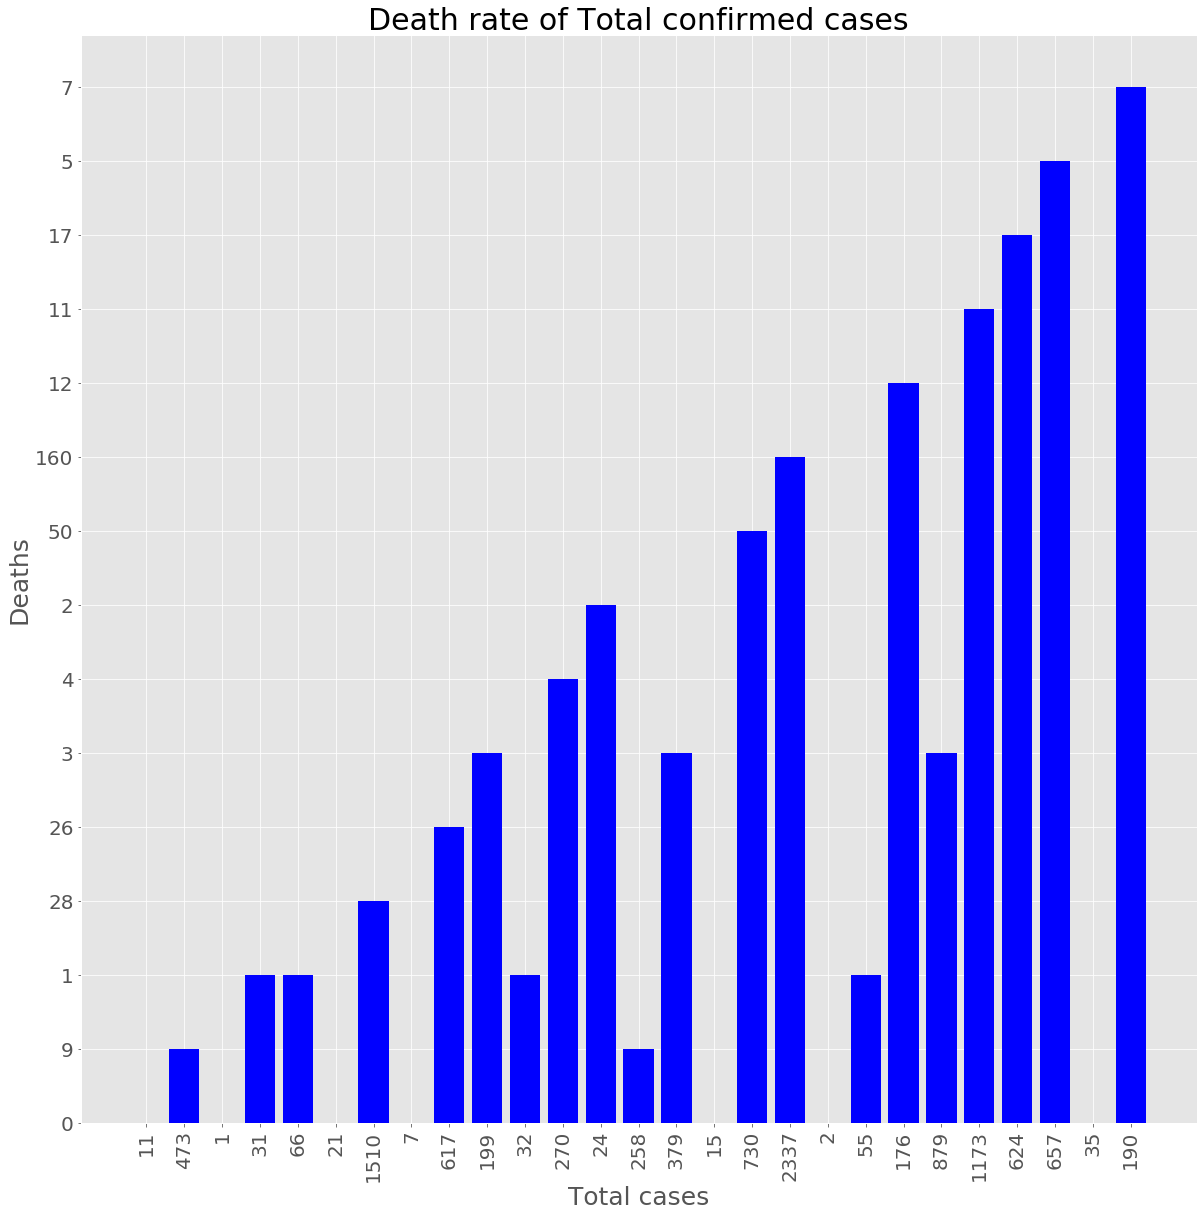

In [13]:
plt.figure(figsize=(20,20))
plt.bar('TOTAL CONFIRMED','DEATH',data=df,color='blue')
plt.xlabel('Total cases',fontsize=25)
plt.ylabel('Deaths',fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.title("Death rate of Total confirmed cases",fontsize=30)
plt.savefig('Death_rate_Of_TC.png')
plt.show()

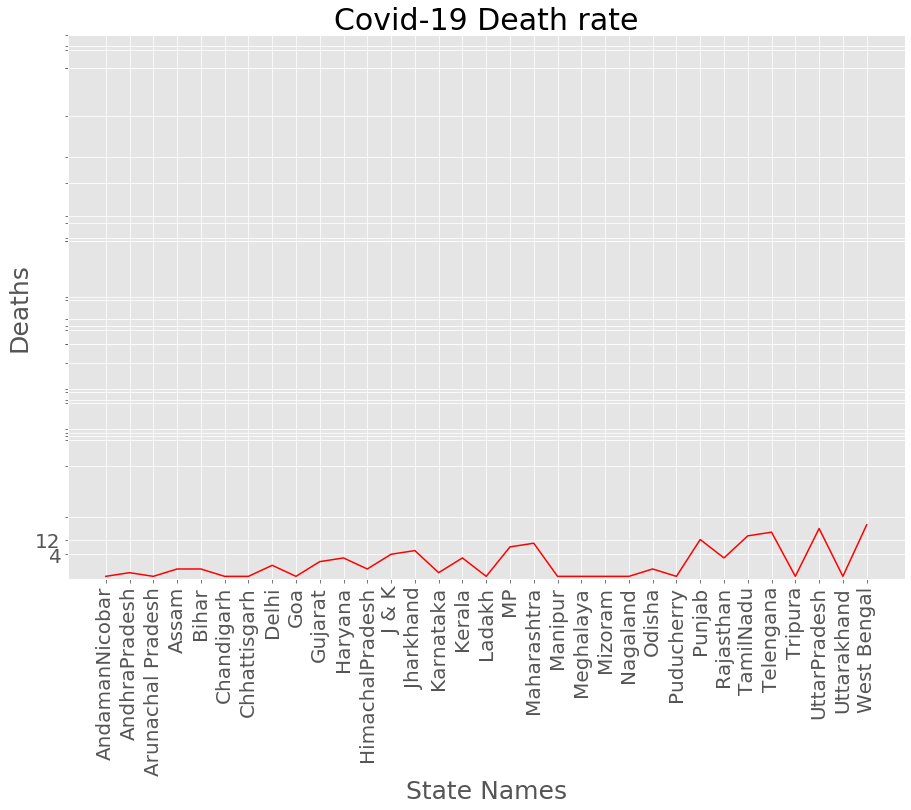

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import random
# l1=df1['DEATH'].to_list()
# l1.sort()
# l1
# l1=df1['DEATH'].to_list()
# l1.sort()
# l1# l1=df1['DEATH'].to_list()
# l1.sort()
# l1
plt.figure(figsize=(15,10))
l2=df['STATE NAMES'].to_list()
x=l2
# df1['DEATH']=df['DEATH'].map(int)
# l1=df1['DEATH'].to_list()
# l1.sort()
# y=l1
y=df['DEATH'].to_list()
plt.plot(x,y,color='red')
plt.xlabel('State Names',fontsize=25)
plt.ylabel('Deaths',fontsize=25)
plt.yticks(np.random.randint(0,150,33),fontsize=20)
#plt.yticks([np.random.random(0,150)])
plt.xticks(fontsize=20,rotation=90)
plt.title("Covid-19 Death rate",fontsize=30)
plt.show()

In [39]:
df1=df.drop_duplicates(subset='DEATH',keep='first')
df1

,STATE NAMES,TOTAL CONFIRMED,CURED/MIGRATED,DEATH
1,AndamanNicobar,11,10,0
0,AndhraPradesh,473,14,9
27,Assam,31,0,1
5,Delhi,1510,30,28
7,Gujarat,617,55,26
8,Haryana,199,34,3
10,J & K,270,16,4
28,Jharkhand,24,0,2
14,MP,730,51,50
15,Maharashtra,2337,229,160


In [35]:
df1['DEATH']=df['DEATH'].map(int)
l1=df1['DEATH'].to_list()
l1.sort()
y=l1
#print(y)
#print(l1)

[0, 1, 2, 3, 4, 5, 7, 9, 11, 12, 17, 26, 28, 50, 160]


c:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
l2=df['STATE NAMES'].to_list()
x=l2
#print(x)

['AndamanNicobar', 'AndhraPradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'HimachalPradesh', 'J & K', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'MP', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'TamilNadu', 'Telengana', 'Tripura', 'UttarPradesh', 'Uttarakhand', 'West Bengal']
